<a href="https://colab.research.google.com/github/veronicaramirezl/multiclass_deep_learning/blob/main/Multi_classs_classifcation_problem_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi class classification model that can be separable by linear metrics

We are gou¿ing to use the toy dataset #BLOBs to create a DL nn that will classify multiple classes of blobs with non linear and linear functions.

Here you can find both the import for the dataset, the training and testing loops and the model.

In [32]:
# Import libraries

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open ("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions

In [2]:
# DEvce agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
#Set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
NUM_SAMPLES = 4000
RANDOM_SEED = 42

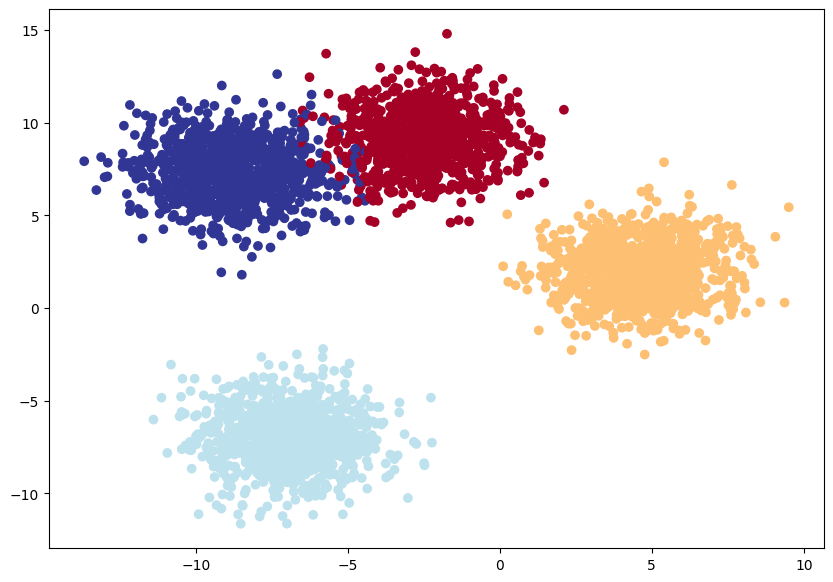

In [10]:
# Create multi-class data

X_blob, y_blob = make_blobs(n_samples = NUM_SAMPLES,                              #Samples of the dataset
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)
X_blob = torch.from_numpy(X_blob).type(torch.float)                               # Converting the data to tensors
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob,               # Splitting the data into training and testing dtasets withthe sklear library
                                                    test_size = 0.2,
                                                    random_state = RANDOM_SEED)

#Plot data
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)


In [11]:
# Create the model

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units= 8):
        super().__init__()
        '''
        Initializes the model
        Args:
            input_features: The number of input features
            output_features: The number of output classes
            hidden_units: The number of hidden units between layers.Default is 8

          Returns:
            A tensor with logits for each class.
        '''
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_features)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

model = BlobModel(input_features = 2,
                  output_features= 4
                ).to(device)


In [16]:
# Create a loss function and optimizer

loss = nn.CrossEntropyLoss()                                                      # if we had an unbalanced dataset (less N in one class) we should assign weights.
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1)

def acc(y_pred, y_true):
  correct = torch.eq(y_pred, y_true).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [7]:
model(X_test).to(device)
'''
In order to evaluate and test our models we need to convert the logits into something we can compare with the labels, that can be done with the softmax function.

'''

'\nIn order to evaluate and test our models we need to convert the logits into something we can compare with the labels, that can be done with the softmax function.\n\n'

In [18]:
# Start training the model

torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()
  y_logits= model(X_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim=1)                         # Softmax is the activation function for multiple classification.
  loss_train = loss(y_logits, y_train)                                            # It gives out a tensor that tells us the probability for each class. argmax tells you the location of the tensor with the biggest probability.
  accuracy = acc(y_pred = y_pred, y_true=y_train)
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

  # Test the loop
  model.eval()
  with torch.inference_mode():
    y_test_logits = model(X_test)
    y_test_preds = torch.softmax(y_test_logits, dim = 1).argmax(dim = 1)
    loss_test = loss(y_test_logits, y_test)
    test_accuracy = acc(y_pred = y_test_preds, y_true = y_test)

  # Visualize
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss_train: {loss_train: .5f} | Accuracy train: {accuracy: .2f} | Loss_test: {loss_test: .5f} | Accuracy test: {test_accuracy: .2f}")




Epoch: 0 | Loss_train:  0.02410 | Accuracy train:  99.09 | Loss_test:  0.01350 | Accuracy test:  99.38
Epoch: 100 | Loss_train:  0.02400 | Accuracy train:  99.09 | Loss_test:  0.01345 | Accuracy test:  99.38
Epoch: 200 | Loss_train:  0.02389 | Accuracy train:  99.12 | Loss_test:  0.01341 | Accuracy test:  99.38
Epoch: 300 | Loss_train:  0.02379 | Accuracy train:  99.12 | Loss_test:  0.01336 | Accuracy test:  99.38
Epoch: 400 | Loss_train:  0.02370 | Accuracy train:  99.12 | Loss_test:  0.01333 | Accuracy test:  99.38
Epoch: 500 | Loss_train:  0.02361 | Accuracy train:  99.12 | Loss_test:  0.01329 | Accuracy test:  99.38
Epoch: 600 | Loss_train:  0.02352 | Accuracy train:  99.12 | Loss_test:  0.01326 | Accuracy test:  99.38
Epoch: 700 | Loss_train:  0.02343 | Accuracy train:  99.12 | Loss_test:  0.01322 | Accuracy test:  99.25
Epoch: 800 | Loss_train:  0.02335 | Accuracy train:  99.12 | Loss_test:  0.01320 | Accuracy test:  99.25
Epoch: 900 | Loss_train:  0.02327 | Accuracy train:  99.1

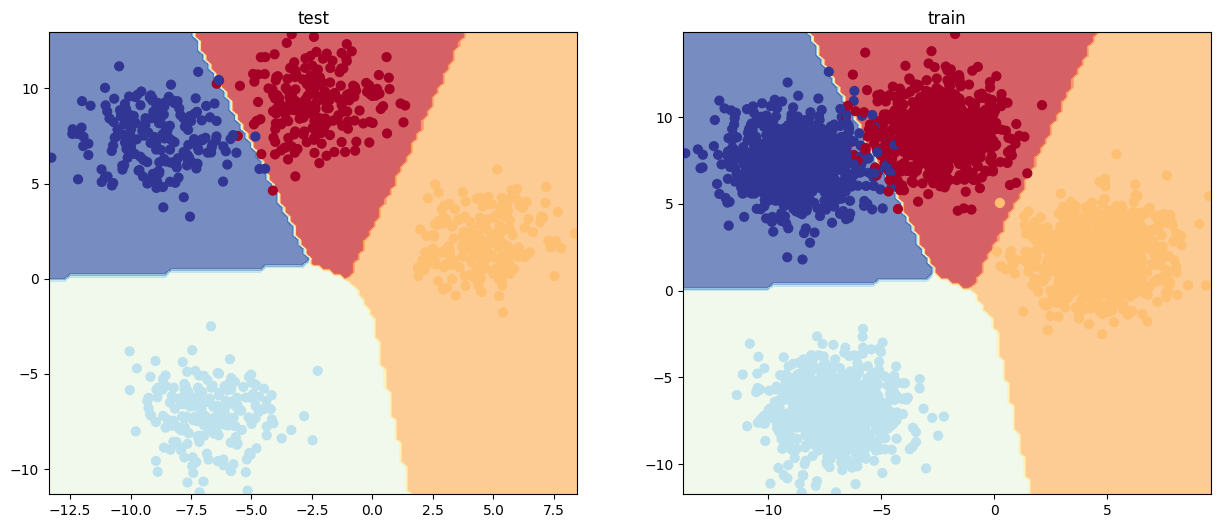

In [48]:
# Visualize!! Plot predictions

model.eval()
with torch.inference_mode():
  y_logits = model(X_test)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  plt.figure(figsize = (15, 6))
  plt.subplot(1, 2, 2)
  plt.title("train")
  plot_decision_boundary(model = model, X = X_train, y = y_train)
  plt.subplot(1, 2, 1)
  plt.title("test")
  plot_decision_boundary(model = model, X = X_test, y = y_test)
